**CNN on CIFAIR10 dataset**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
print(x_train[50])

In [ ]:
#Normalization between 0 to 1
x_train,x_test=x_train/255.0,x_test/255.0

In [ ]:
print(x_train[50])

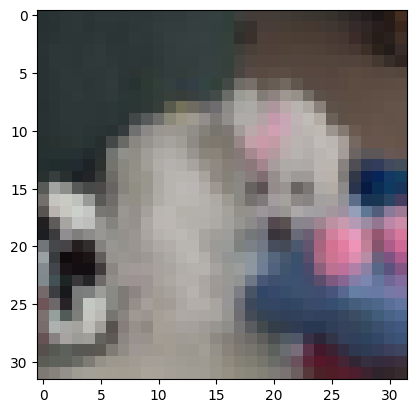

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(x_train[27150])
plt.show()

In [ ]:
from tensorflow.keras import utils
y_train=utils.to_categorical(y_train,10)
y_test=utils.to_categorical(y_test,10)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [ ]:
#Build CNN model
model=Sequential(
    [
        Dense(64,input_shape=(32,32,3)),
        Conv2D(64,kernel_size=(3,3),activation='relu'),
        Conv2D(64,kernel_size=(3,3),activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Conv2D(128,kernel_size=(3,3),activation='relu'),
        Conv2D(128,kernel_size=(3,3),activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.3),
        Flatten(),
        Dense(128,activation='relu'),
        Dense(10,activation='softmax')
    ]
)

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='sgd')

In [ ]:
train=model.fit(x_train,y_train,batch_size=32,verbose=1,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 22s 10ms/step - loss: 2.0298 - accuracy: 0.2562 - val_loss: 1.8944 - val_accuracy: 0.3337
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5953 - accuracy: 0.4258 - val_loss: 1.4446 - val_accuracy: 0.4793
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4261 - accuracy: 0.4857 - val_loss: 1.3506 - val_accuracy: 0.5169
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3131 - accuracy: 0.5289 - val_loss: 1.2446 - val_accuracy: 0.5597
Epoch 5/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.2235 - accuracy: 0.5633 - val_loss: 1.1755 - val_accuracy: 0.5845
Epoch 6/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.1459 - accuracy: 0.5939 - val_loss: 1.1720 - val_accuracy: 0.5865
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0711 - accuracy: 0.6216 - val_loss: 1.0559 - va

In [ ]:
model.summary()

In [ ]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.9603 - accuracy: 0.6676
0.9603360295295715
0.6675999760627747


In [ ]:
#make predictions
arr=model.predict([x_train[12150].reshape(1,32,32,3)])
print(arr)

1/1 [==============================] - 0s 19ms/step
[[2.8657729e-03 9.2911410e-01 2.9052002e-03 8.3029241e-04 3.1174221e-03
  2.0471918e-03 1.2048951e-03 6.6458283e-04 1.0175119e-03 5.6233078e-02]]


In [ ]:
label=np.argmax(arr)
print(label)

1
